In [5]:
import pandas as pd
import numpy as np

df = pd.read_excel("C:/Users/MKINA18/Desktop/Grev Makalesi/Merged Politus and EÇT data.xlsx", index_col=[0,1])

# FILTER

In [6]:
print([i for i in df.columns])

['ofke_labour_and_employment', 'korku_labour_and_employment', 'umut_labour_and_employment', 'onaylamama_labour_and_employment', 'topic_social_policy', 'topic_labour_and_employment', 'topic_education', 'topic_elections_and_voting', 'topic_justice_system', 'topic_human_rights', 'topic_economy', 'erdogan_pro', 'erdogan_against', 'erdogan_neutral', 'adm1', 'pcode_x', 'ide_turkish_nationalism', 'ide_conservatism', 'ide_islamism', 'ide_liberalism', 'ide_kemalism', 'ide_social_democracy', 'ide_socialism', 'ide_feminism', 'ide_environmentalism', 'ide_kurdish_national_movement', 'ide_secularism', 'PC1', 'PC2', 'centre_and_less_religious', 'left_wing_and_religious', 'right_wing_and_religious', 'minnet_social_policy', 'korku_human_rights', 'korku_economy', 'korku_education', 'korku_health_and_public_health', 'korku_justice_system', 'ofke_human_rights', 'ofke_economy', 'ofke_education', 'ofke_justice_system', 'arzu_social_policy', 'arzu_human_rights', 'arzu_justice_system', 'arzu_labour_and_employ

In [7]:
df_filtered = df[(df['date'].dt.year >= 2015) & (df['date'].dt.year <= 2022)]

In [8]:
df_filtered["police_int_neighbors"] = df_filtered["police_int_hard_neighbors"] + df_filtered["police_int_soft_neighbors"]

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_8652\1663293134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["police_int_neighbors"] = df_filtered["police_int_hard_neighbors"] + df_filtered["police_int_soft_neighbors"]


# Standardize 

In [9]:
z_var = ["GDP","korku_labour_and_employment","minnet_labour_and_employment","ofke_labour_and_employment","topic_labour_and_employment","umut_labour_and_employment","umutsuzluk_labour_and_employment"]
df_filtered[z_var] = df_filtered[z_var].apply(lambda x: (x - x.mean()) / x.std())

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_8652\691193384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[z_var] = df_filtered[z_var].apply(lambda x: (x - x.mean()) / x.std())


# Interaction effects

In [16]:
emotions = ["ofke_labour_and_employment","korku_labour_and_employment", "umut_labour_and_employment", "umutsuzluk_labour_and_employment", "minnet_labour_and_employment"]
eçt_vars = ["protest_count_neighbors", "employer_int_neighbors"]

for i in emotions:
    df_filtered[i.split("_")[0]+"_X_diffusion"] = df_filtered[i]*df_filtered["protest_count_neighbors"]
            
for i in emotions:
    for j in eçt_vars:
        df_filtered[i.split("_")[0]+ "_X_employer_int_neighbors"] = df_filtered[i]*df_filtered["employer_int_neighbors"]
        
for i in emotions:
    df_filtered[i.split("_")[0]+ "_X_election"] = df_filtered[i]*df_filtered["election_times"]

# MODEL

In [17]:
#FOR FURTHER ANALYSIS

import statsmodels.api as sm
import statsmodels.formula.api as smf

spatio_temporal_variables = ' + protest_count_neighbors'
repression = '+ employer_int_neighbors'
emotion_variables =  "+ ofke_labour_and_employment + korku_labour_and_employment + umut_labour_and_employment + umutsuzluk_labour_and_employment + minnet_labour_and_employment + topic_labour_and_employment"
interaction_effects_diffusion =  "+ ofke_X_diffusion + korku_X_diffusion + minnet_X_diffusion + umut_X_diffusion + umutsuzluk_X_diffusion"
interaction_effects_election =  "+ korku_X_election + ofke_X_election + umutsuzluk_X_election + umut_X_election + minnet_X_election"
interaction_effects_employer_int =  "+ korku_X_employer_int_neighbors + ofke_X_employer_int_neighbors + umutsuzluk_X_employer_int_neighbors + umut_X_employer_int_neighbors + minnet_X_employer_int_neighbors"

df_filtered = df_filtered.dropna()
exposure = np.log(df_filtered['population'])

In [18]:
formula = "protest_count ~ 1 + time_trend + time_trend_squared + election_times + kurdish + CPI + unemployment_rate + GDP " +  emotion_variables + spatio_temporal_variables + repression + interaction_effects_diffusion
model5 = smf.glm(formula=formula, data=df_filtered.dropna(), family=sm.families.NegativeBinomial(), exposure=exposure).fit()
formula = "protest_participants ~ 1 + time_trend + time_trend_squared + election_times + kurdish + CPI + unemployment_rate + GDP " + emotion_variables + spatio_temporal_variables + repression + interaction_effects_diffusion
model6 = smf.glm(formula=formula, data=df_filtered.dropna(), family=sm.families.NegativeBinomial(), exposure=exposure).fit()

C:\Users\MKINA18\AppData\Local\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\MKINA18\AppData\Local\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [19]:
formula = "protest_count ~ 1 + time_trend + time_trend_squared + election_times + kurdish + CPI + unemployment_rate + GDP " +  emotion_variables + spatio_temporal_variables + repression + interaction_effects_election
model7 = smf.glm(formula=formula, data=df_filtered.dropna(), family=sm.families.NegativeBinomial(), exposure=exposure).fit()
formula = "protest_participants ~ 1 + time_trend + time_trend_squared + election_times + kurdish + CPI + unemployment_rate + GDP " + emotion_variables + spatio_temporal_variables + repression + interaction_effects_election
model8 = smf.glm(formula=formula, data=df_filtered.dropna(), family=sm.families.NegativeBinomial(), exposure=exposure).fit()

C:\Users\MKINA18\AppData\Local\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\MKINA18\AppData\Local\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [20]:
formula = "protest_count ~ 1 + time_trend + time_trend_squared + election_times + kurdish + CPI + unemployment_rate + GDP " +  emotion_variables + spatio_temporal_variables + repression + interaction_effects_employer_int
model9 = smf.glm(formula=formula, data=df_filtered.dropna(), family=sm.families.NegativeBinomial(), exposure=exposure).fit()
formula = "protest_participants ~ 1 + time_trend + time_trend_squared + election_times + kurdish + CPI + unemployment_rate + GDP " + emotion_variables + spatio_temporal_variables + repression + interaction_effects_employer_int
model10 = smf.glm(formula=formula, data=df_filtered.dropna(), family=sm.families.NegativeBinomial(), exposure=exposure).fit()

C:\Users\MKINA18\AppData\Local\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\MKINA18\AppData\Local\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [27]:
from statsmodels.iolib.summary2 import summary_col

summary_table = summary_col(results=[model5, model6, model7, model8, model9, model10], stars=True, float_format="%0.2f",
                            model_names=['5','6','7','8','9','10'],
                            info_dict={'N': lambda x: "{0:d}".format(int(x.nobs)),
                                       'Pseudo R-squared': lambda x: "{:.2f}".format(x.prsquared)})

print(summary_table)


                                       5        6        7        8        9        10   
-----------------------------------------------------------------------------------------
CPI                                 -0.00    -0.01*** -0.00    -0.01*** 0.00     -0.01***
                                    (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)  
GDP                                 0.78***  1.78***  0.78***  1.78***  0.78***  1.79*** 
                                    (0.01)   (0.01)   (0.01)   (0.01)   (0.01)   (0.01)  
Intercept                           -3.55*** 1.31***  -3.55*** 1.35***  -3.55*** 1.30*** 
                                    (0.08)   (0.04)   (0.08)   (0.04)   (0.08)   (0.04)  
election_times[T.True]              0.08     0.68***  0.08     0.61***  0.08     0.66*** 
                                    (0.07)   (0.04)   (0.07)   (0.04)   (0.07)   (0.04)  
employer_int_neighbors              0.07     0.30***  0.07     0.27***  0.03     -0.54***
         

## Testing for Multicollinearity

In [23]:
df_filtered[emotions].corr()

,ofke_labour_and_employment,korku_labour_and_employment,umut_labour_and_employment,umutsuzluk_labour_and_employment,minnet_labour_and_employment
ofke_labour_and_employment,1.000000,0.028372,0.067318,0.073981,0.015929
korku_labour_and_employment,0.028372,1.000000,0.034370,0.054413,0.045644
umut_labour_and_employment,0.067318,0.034370,1.000000,0.092683,0.166481
umutsuzluk_labour_and_employment,0.073981,0.054413,0.092683,1.000000,0.048131
minnet_labour_and_employment,0.015929,0.045644,0.166481,0.048131,1.000000


## Descriptive Statistics

In [24]:
model_variables = ['protest_count','protest_participants','CPI', 'unemployment_rate', 'GDP','protest_count_neighbors','employer_int_neighbors']
model_variables.extend(emotions)

descriptive_stats_rounded = df_filtered[model_variables].dropna().describe().transpose().round(2)
descriptive_stats_rounded['max'] = descriptive_stats_rounded['max'].round(1)
descriptive_stats_rounded

,count,mean,std,min,25%,50%,75%,max
protest_count,7695.0,0.86,2.69,0.00,0.00,0.00,1.00,49.0
protest_participants,7695.0,179.54,1437.60,0.00,0.00,0.00,10.86,54476.8
CPI,7695.0,16.50,14.24,7.48,8.48,12.18,16.90,75.0
unemployment_rate,7695.0,11.26,5.36,3.80,8.10,10.20,13.00,33.7
GDP,7695.0,0.00,1.00,-0.32,-0.27,-0.23,-0.06,10.0
protest_count_neighbors,7695.0,0.87,1.49,0.00,0.00,0.40,1.00,41.0
employer_int_neighbors,7695.0,0.01,0.24,0.00,0.00,0.00,0.00,15.0
ofke_labour_and_employment,7695.0,0.00,0.99,-1.68,-0.46,0.05,0.51,2.7
korku_labour_and_employment,7695.0,-0.01,0.86,-0.10,-0.10,-0.10,-0.10,30.4
umut_labour_and_employment,7695.0,0.00,1.00,-0.45,-0.45,-0.45,0.12,13.9


## Marginal Effects

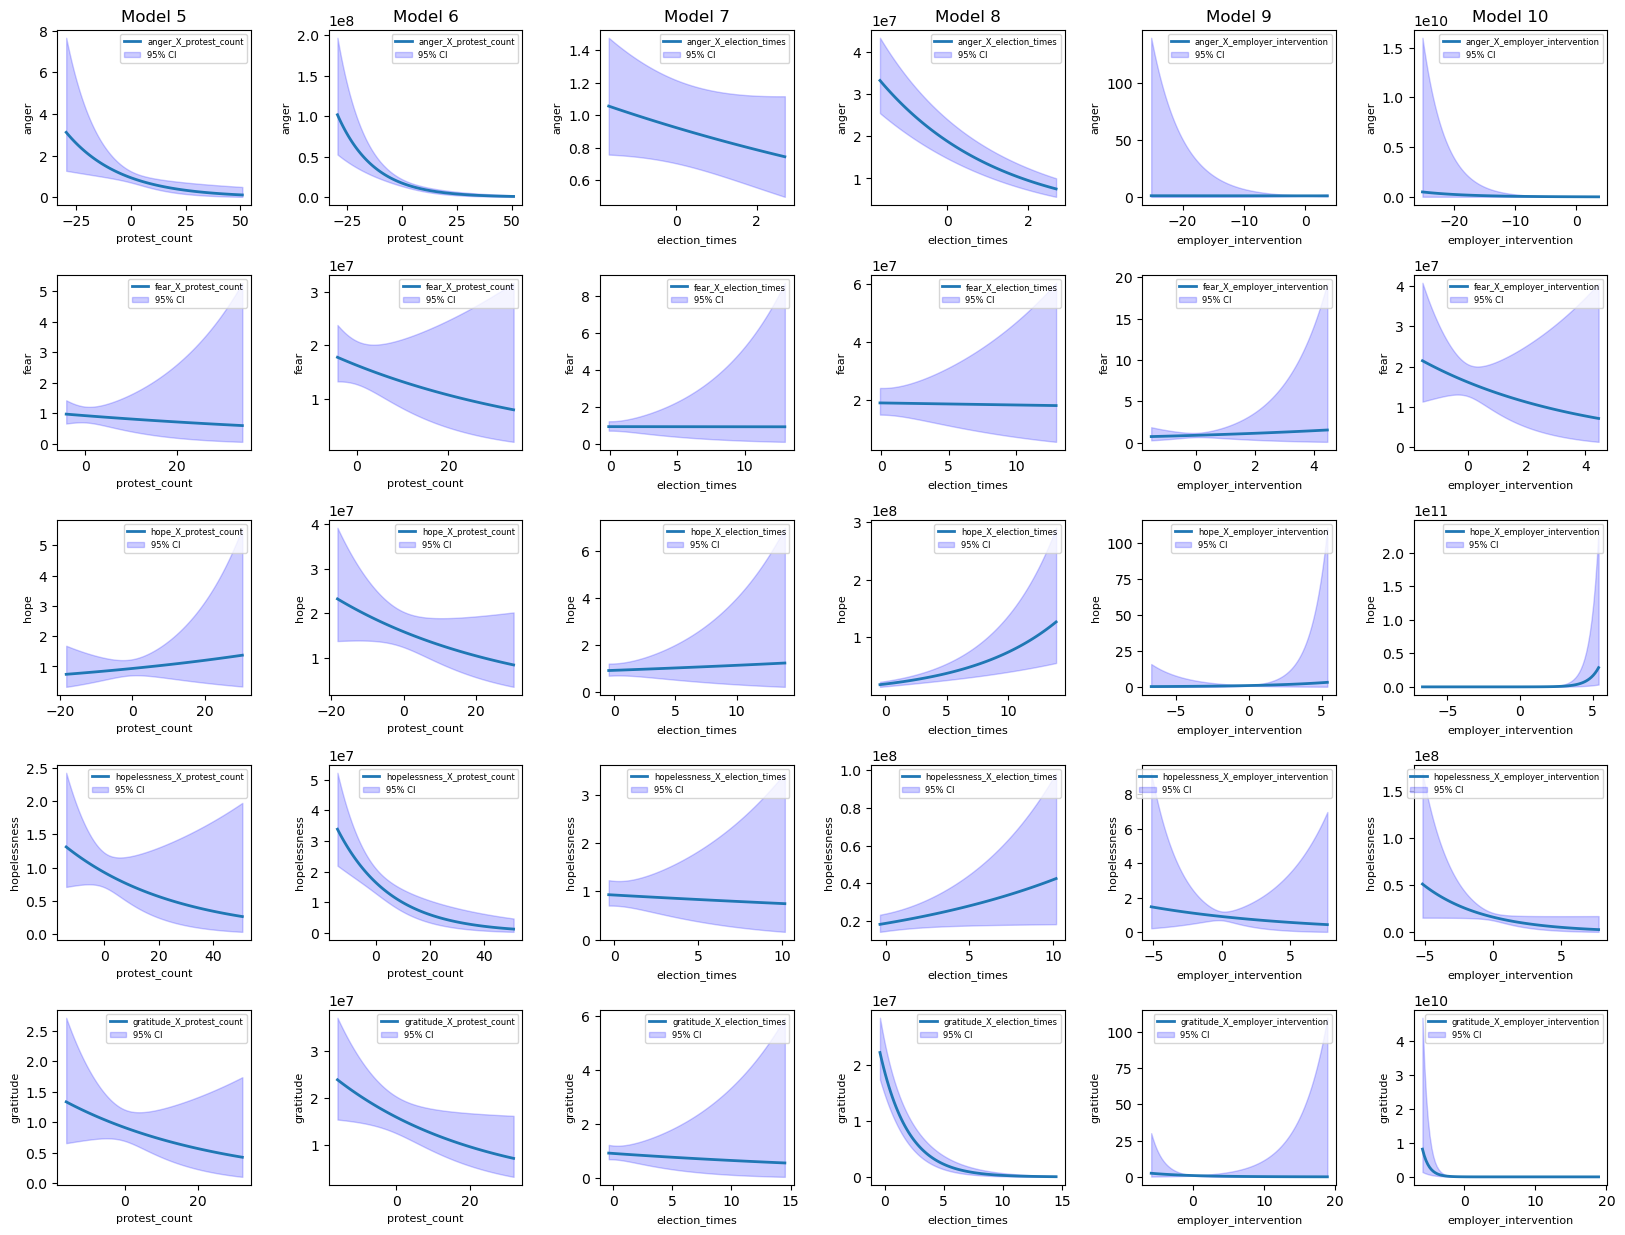

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Define your models and interaction terms
models = [model5, model6, model7, model8, model9, model10]

model_interactions = {
    "Model 5": ['ofke_X_diffusion', 'korku_X_diffusion', 'umut_X_diffusion', 'umutsuzluk_X_diffusion', 'minnet_X_diffusion'],
    "Model 6": ['ofke_X_diffusion', 'korku_X_diffusion', 'umut_X_diffusion', 'umutsuzluk_X_diffusion', 'minnet_X_diffusion'],
    "Model 7": ['ofke_X_election', 'korku_X_election', 'umut_X_election', 'umutsuzluk_X_election', 'minnet_X_election'],
    "Model 8": ['ofke_X_election', 'korku_X_election', 'umut_X_election', 'umutsuzluk_X_election', 'minnet_X_election'],
    "Model 9": ['ofke_X_employer_int_neighbors_lag1', 'korku_X_employer_int_neighbors_lag1', 'umut_X_employer_int_neighbors_lag1', 'umutsuzluk_X_employer_int_neighbors_lag1', 'minnet_X_employer_int_neighbors_lag1'],
    "Model 10": ['ofke_X_employer_int_neighbors_lag1', 'korku_X_employer_int_neighbors_lag1', 'umut_X_employer_int_neighbors_lag1', 'umutsuzluk_X_employer_int_neighbors_lag1', 'minnet_X_employer_int_neighbors_lag1'],
}

# English mapping for terms
term_mapping = {
    'ofke': 'anger',
    'korku': 'fear',
    'umut': 'hope',
    'umutsuzluk': 'hopelessness',
    'minnet': 'gratitude',
    'election': 'election_times',
    'diffusion': 'protest_count',
    'employer_int_neighbors_lag1': 'employer_intervention',
    'lag1': 'employer_intervention'
}

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add model names as titles for each column
for col_idx, model_name in enumerate(model_interactions.keys()):
    axes[0, col_idx].set_title(model_name, fontsize=12)

# Plot the marginal effects
for col_idx, (model_name, interaction_terms) in enumerate(model_interactions.items()):
    model = models[col_idx]  # Get the corresponding model

    for row_idx, term in enumerate(interaction_terms):
        # Generate a range of values for the interaction term
        interaction_values = np.linspace(df_filtered[term].min(), df_filtered[term].max(), 100)
        
        # Prepare DataFrame for predictions
        df_temp = df_filtered.copy()

        # Calculate marginal effects and confidence intervals
        marginal_effects = []
        lower_bound = []
        upper_bound = []

        for value in interaction_values:
            df_temp[term] = value
            pred = model.get_prediction(df_temp)
            marginal_effects.append(pred.predicted_mean)
            ci = pred.conf_int()
            lower_bound.append(ci[:, 0])
            upper_bound.append(ci[:, 1])

        # Convert lists to numpy arrays for plotting
        marginal_effects = np.array(marginal_effects).mean(axis=1)
        lower_bound = np.array(lower_bound).mean(axis=1)
        upper_bound = np.array(upper_bound).mean(axis=1)

        # Mapping the term to English
        term_eng = term.split("_")
        emotion_eng = term_mapping.get(term_eng[0], term_eng[0])
        context_eng = term_mapping.get(term_eng[-1], term_eng[-1])

        # Plot in the appropriate subplot
        ax = axes[row_idx, col_idx]
        ax.plot(interaction_values, marginal_effects, label=f'{emotion_eng}_X_{context_eng}', linewidth=2)
        ax.fill_between(interaction_values, lower_bound, upper_bound, color='b', alpha=0.2, label='95% CI')
        ax.set_xlabel(context_eng, fontsize=8)
        ax.set_ylabel(f'{emotion_eng}', fontsize=8)
        ax.legend(fontsize=6)

# Set the overall title
#fig.suptitle('Marginal Effects Plots for Emotions and Models', fontsize=16)

# Save the plot as an image
plt.savefig("marginal_effects_combined_plot.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()